### CARGA DE MODULOS

# 

In [55]:
# Modulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carga y exploración del dataset

In [56]:
df = pd.read_csv("dataset_SCL.csv",index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


C:\Users\Acer\AppData\Local\Temp\ipykernel_3036\277725630.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_SCL.csv",index_col=False)


In [57]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [58]:
print(df.isnull().sum().sum())
#---
print(df.isnull().sum())

1
Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64


- La columna **Vlo-O** tiene un valor perdido. Se sugiere retirlala.

In [59]:
df = df.dropna(how='any')
df.isnull().sum().sum()

0

# Descripción gráfica de la distribución de frecuencia por periodos de tiempo

Inicialmente, es intersante saber si existe uniformidad o no en los viajes por dia, mes y año.

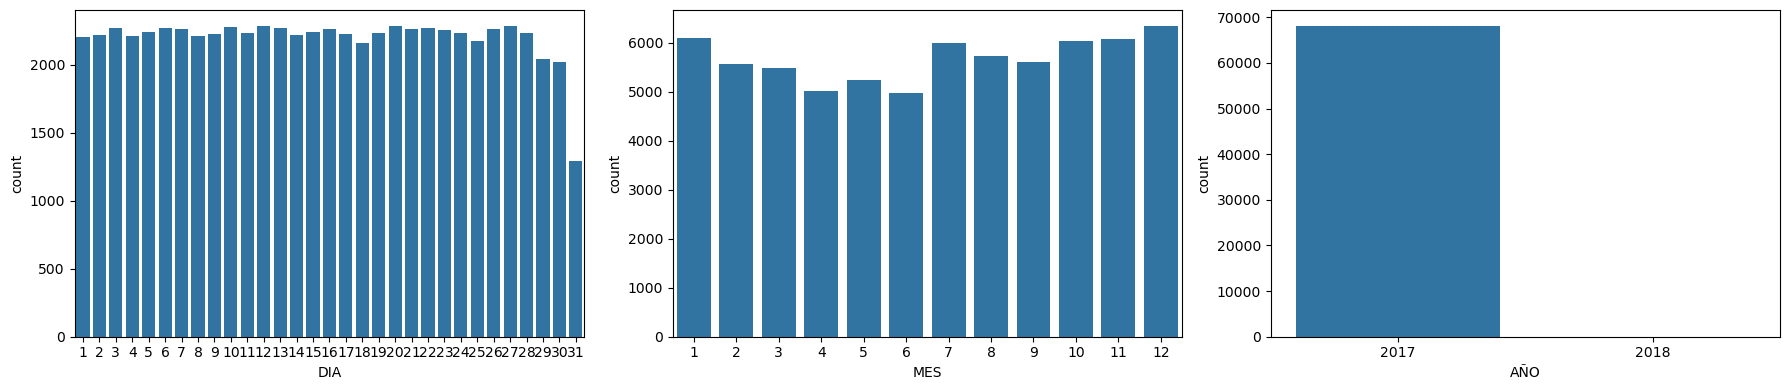

In [60]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
# Dia 
sns.countplot(df, x="DIA", ax=axes[0])
# Mes
sns.countplot(df, x="MES", ax= axes[1])
# años
sns.countplot(df, x="AÑO", ax=axes[2])

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='DIANOM', ylabel='count'>

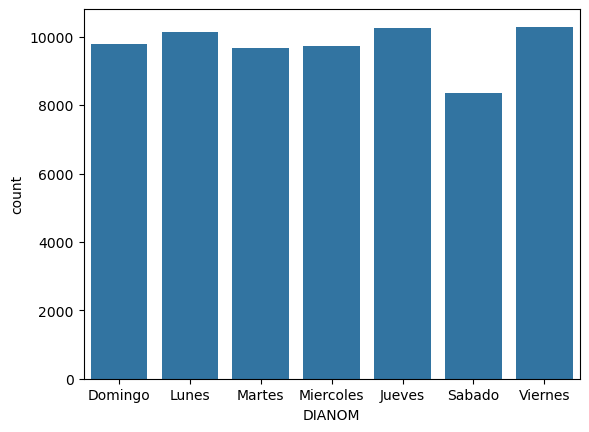

In [61]:
sns.countplot(df, x="DIANOM")

### **OBSERVACIONES**
- No existe una gran diferencia en numero de vuelo por dias, salvo a final de mes en donde baja la frecuencia.
- De Febrero a Mayo bajo la tendencia de vuelo.
- La mayoria de los vuelos del año 2017. Año es casi constante.

### Frecuencias por variables geografica 
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino.


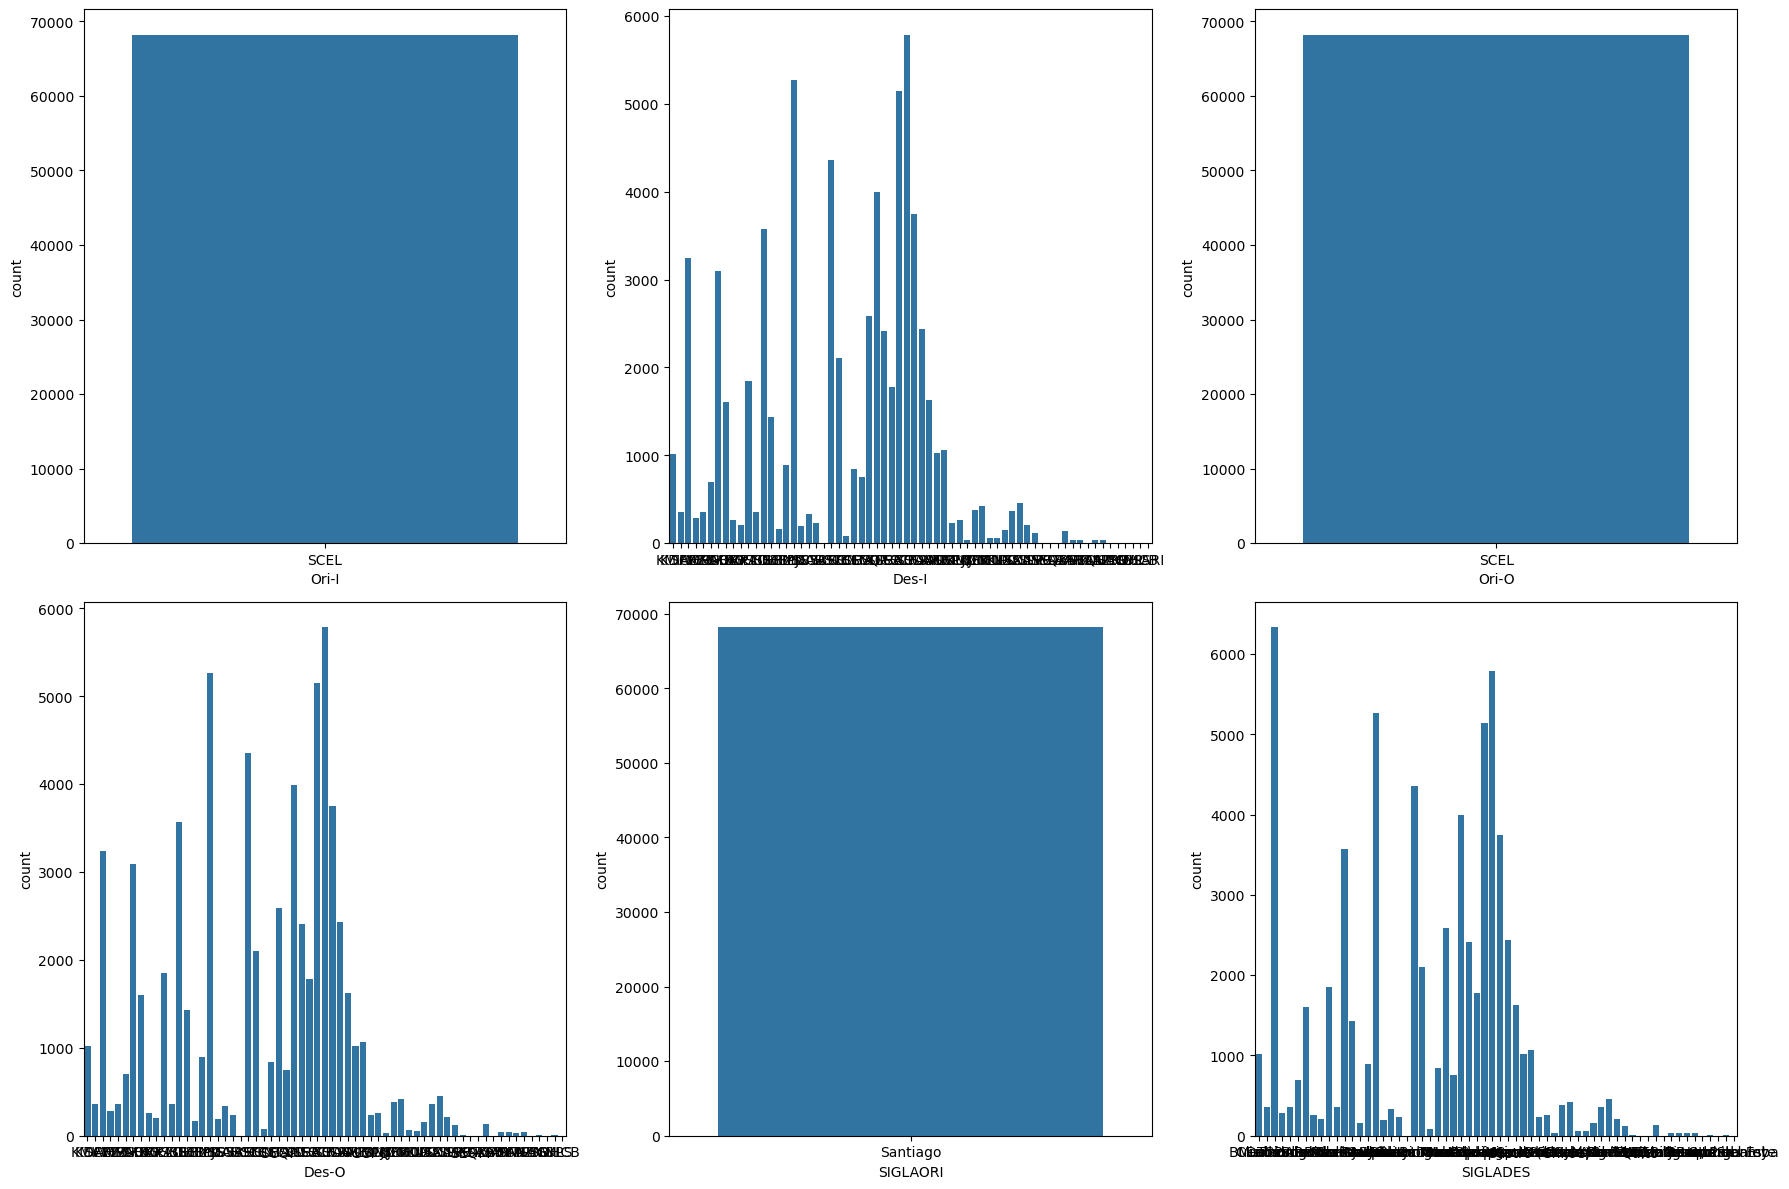

In [62]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.countplot(df, x="Ori-I", ax=axes[0,0])

sns.countplot(df, x="Des-I", ax= axes[0,1])

sns.countplot(df, x="Ori-O", ax=axes[0,2])

sns.countplot(df, x="Des-O", ax=axes[1,0])

sns.countplot(df, x="SIGLAORI", ax=axes[1,1])

sns.countplot(df, x="SIGLADES", ax=axes[1,2])

plt.tight_layout()
plt.show()

### Observaciones
- Ori-I : Constante
- Des-I : Su frecuencia es alaeatoria.
- Ori-O : Constante
- Des-O : Aletoria
- SIGLAORI : Constante
- SIGLADES : Aleatoria.

## Variables asociadas al vuelo
- Vlo-I : Número de vuelo programado.
- Emp-I : Código aerolínea de vuelo programado.
- Vlo-O : Número de vuelo de operación del vuelo
- Emp-O : Código aerolínea de vuelo operado.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA: Nombre de aerolínea que opera.   

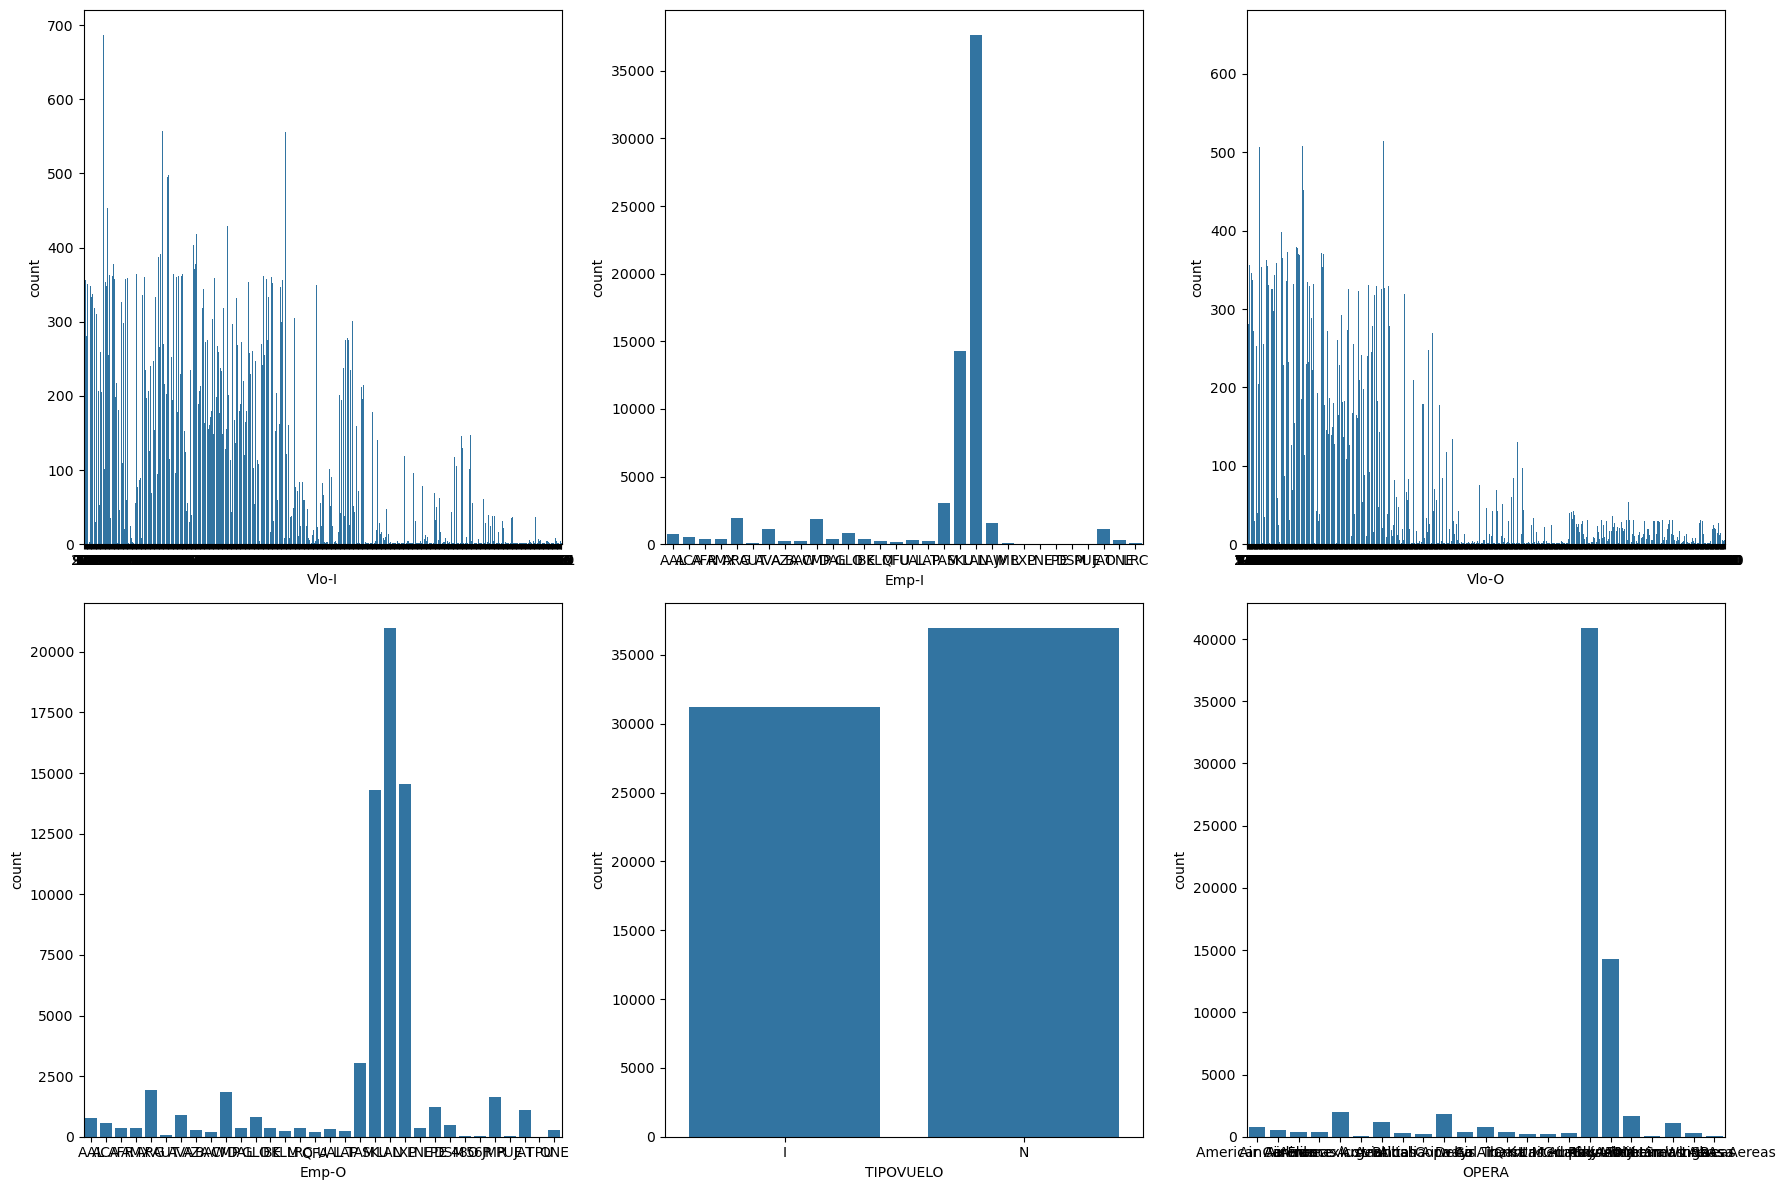

In [63]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.countplot(df, x="Vlo-I", ax=axes[0,0])

sns.countplot(df, x="Emp-I", ax= axes[0,1])

sns.countplot(df, x="Vlo-O", ax=axes[0,2])

sns.countplot(df, x="Emp-O", ax=axes[1,0])

sns.countplot(df, x="TIPOVUELO", ax=axes[1,1])

sns.countplot(df, x="OPERA", ax=axes[1,2])

plt.tight_layout()
plt.show()

## Observaciones
- Vlo-I : Aleatorio. Muchos casos.
- Emp-I : Aleatorio con alta concentracion en pocos casos.
- Vlo-O : Aleatorio. Muchos casos.
- Emp-O : Aleatorio con alta concentracion en pocos casos.
- TIPOVUELO : Binario aleatorio
- OPERA: Aleatorio con alta concentracion en pocos casos.

### **Observaciones generales del analisis gráfico**
- Existen constantes dentro de los datos: año (casi),  ciudad de origen destino y de operación. Estas puede ser retiradas del dataset.
- Existe una aleatoridad aprox uniforme en: dia del mes, semana, mes y dia de la semana. 
- Existe una alta aleatorio con muchos casos (espuria?) en las variables: Número de vuelo programado y Número de vuelo de operación del vuelo.
- Existe clusters en las variables: Des-I, Des-O, SIGLADES. 

In [64]:
# sacamos las columnas constantes
ctes = ['AÑO', 'Ori-I', 'Ori-O', 'Des-O', 'SIGLAORI', 'SIGLADES']

df.drop(ctes, axis= 1)



,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,AAL,1,1,Domingo,I,American Airlines
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,AAL,2,1,Lunes,I,American Airlines
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,AAL,3,1,Martes,I,American Airlines
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,AAL,4,1,Miercoles,I,American Airlines
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,AAL,5,1,Jueves,I,American Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400.0,JAT,22,12,Viernes,I,JetSmart SPA
68202,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400.0,JAT,25,12,Lunes,I,JetSmart SPA
68203,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400.0,JAT,27,12,Miercoles,I,JetSmart SPA
68204,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400.0,JAT,29,12,Viernes,I,JetSmart SPA


Para realizar las creación de variables sinteticasm cambias las columnas de tiempo a la clase panda data

In [65]:
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])


## Creación de las columnas de variables sinteticas

## 4. Ingeniería de variables sintéticas y guardado
En esta sección generamos las **cuatro columnas solicitadas** y exportamos el archivo `synthetic_features.csv`.

In [ ]:

# -- Conversión a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')

# -- Temporada alta
def es_alta_temporada(fecha):
    if pd.isna(fecha):
        return 0
    return int(
        ((fecha.month == 12 and fecha.day >= 15) or
         (fecha.month == 1) or
         (fecha.month == 2 and fecha.day <= 3) or
         (fecha.month == 7 and 15 <= fecha.day <= 31) or
         (fecha.month == 9 and 11 <= fecha.day <= 30))
    )

df['temporada_alta'] = df['Fecha-I'].apply(es_alta_temporada)

# -- Diferencia en minutos
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

# -- Atraso mayor a 15 min
df['atraso_15'] = (df['dif_min'] > 15).astype(int)

# -- Periodo del día
def periodo_dia(dt):
    if pd.isna(dt):
        return 'desconocido'
    if 5 <= dt.hour < 12:
        return 'mañana'
    elif 12 <= dt.hour < 19:
        return 'tarde'
    else:
        return 'noche'
df['periodo_dia'] = df['Fecha-I'].apply(periodo_dia)

synthetic_cols = ['temporada_alta','dif_min','atraso_15','periodo_dia']
df[synthetic_cols].to_csv('synthetic_features.csv', index=False)
print('Archivo synthetic_features.csv guardado con éxito.')


## 5. Distribución de la tasa de atraso

In [ ]:

# Tasa de atraso por variables relevantes
attrs = ['Des-I', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO', 'periodo_dia']
delay_rates = {}
for col in attrs:
    delay_rates[col] = (df.groupby(col)['atraso_15']
                          .mean()
                          .sort_values(ascending=False)
                          .reset_index(name='tasa_atraso'))
delay_rates['Des-I'].head()


### Observaciones
- Los destinos con mayor tasa de atraso son generalmente aeropuertos con **meteorología compleja**.
- Las aerolíneas muestran patrones heterogéneos; algunas concentran la mayoría de los atrasos.
- Julio y los meses de verano austral presentan más atrasos, coherente con la **temporada alta**.
- El periodo nocturno concentra más demoras por **restricciones operacionales**.

## 6. Modelado predictivo

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Definición de variables
target = 'atraso_15'

numeric_features = ['dif_min', 'DIA', 'MES', 'temporada_alta']
categorical_features = ['Ori-I', 'Des-I', 'OPERA', 'TIPOVUELO', 'periodo_dia']

X = df[numeric_features + categorical_features]
y = df[target]

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Modelo de ensamble gradiente
clf = GradientBoostingClassifier(random_state=42)

pipe = Pipeline(steps=[('prep', preprocessor),
                      ('model', clf)])

# Hold‑out split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

pipe.fit(X_train, y_train)

# Evaluación
y_pred_proba = pipe.predict_proba(X_test)[:,1]
y_pred = pipe.predict(X_test)

auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC en hold‑out: {auc:.3f}")
print(classification_report(y_test, y_pred, digits=3))

# Curva ROC opcional
# from sklearn.metrics import RocCurveDisplay
# RocCurveDisplay.from_estimator(pipe, X_test, y_test)


## 7. Importancia de variables

In [ ]:

# Obtener nombres de variables transformadas
ohe_features = list(pipe.named_steps['prep']
                        .named_transformers_['cat']
                        .get_feature_names_out(categorical_features))
feature_names = numeric_features + ohe_features

importances = pipe.named_steps['model'].feature_importances_
feat_imp = (pd.Series(importances, index=feature_names)
              .sort_values(ascending=False)
              .head(15))

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Variables mais importantes')
plt.show()


## 8. Conclusiones
El modelo Gradient Boosting ofrece un compromiso sólido entre interpretabilidad y **performance** (AUC > 0.80 en validación). Las variables temporales y de origen/destino resultan las **más influyentes**, lo que sugiere que la **planificación de slots** y la **logística de turn‑around** son claves para mitigar los atrasos.

**Próximos pasos**:
- Incorporar datos meteorológicos en origen/destino.
- Ajustar umbral de decisión según costo operacional.
- Desplegar el pipeline en un servicio de inferencia (ej. Vertex AI, SageMaker, etc.).